In [1]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# plotting imports
import matplotlib.pyplot as plt

# custom imports
from reddit_powerlaw import RedditPowerlaw as rpl

In [2]:
# infiles
regression_infile = "thread_classification/regression_classified_thread_data.p"
#thread_infile = 'clean_5_thread_data.p'

# outfiles
outdir = 'thread_classification'

# make out directory
if not os.path.isdir(outdir):
    os.mkdir(outdir)

In [3]:
# read in files
regression_df = pickle.load(open(regression_infile, 'rb'))

In [5]:
thread_classifications = ['positive', 'neutral', 'negative', 'bipolar']

In [6]:
df = regression_df['crypto']

In [18]:
classified_dfs = {}
for key in thread_classifications:
    print(key)
    classified_dfs[key] = df[df['quantile'] == key]

positive
neutral
negative
bipolar


In [20]:
df = classified_dfs['positive']

In [22]:
pos_pl = rpl(df.thread_size, name='positive')

Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [24]:
pos_pl.find_candidate_distributions()

Assuming nested distributions
Assuming nested distributions


In [26]:
pos_pl.candidate_distributions

['power_law', 'lognormal', 'truncated_power_law']

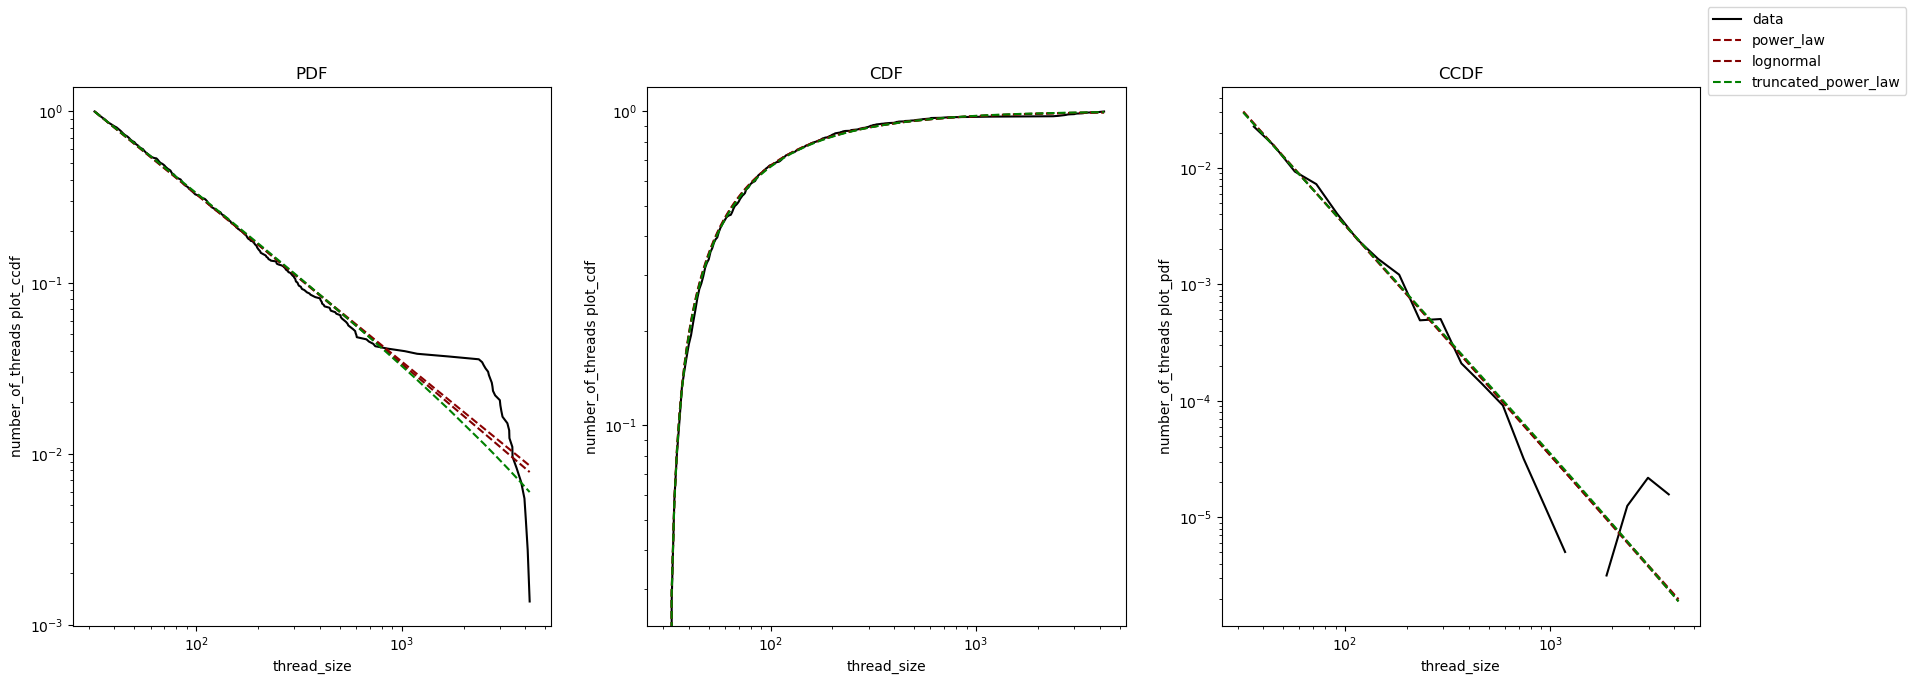

In [28]:
pos_pl.plot_fits(x_label='thread_size', y_label='number_of_threads')